In [1]:
# Setup file
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [181]:
#Get data from website
data = pd.read_html ("https://www.citypopulation.de/en/vietnam/admin/")
#Check the data
#for i in data:
    #print(i)
#Change to DataFrame
# df = pd.DataFrame(data[0])
# df.to_excel(r"C:\Users\nguye\Desktop\Data Science Stuff\Projects\GIS\Vietnam\pop.xlsx")


In [2]:
# Extract the data
pop_df = pd.read_excel(r"C:\Users\nguye\Desktop\Data Science Stuff\Projects\GIS\Vietnam\pop.xlsx")
pop_df = pop_df[["Name", "Status", "PopulationCensus2019-04-01"]]
#Change Population column name to shorter
pop_df = pop_df.rename(columns={"PopulationCensus2019-04-01": "Population"})
#Explore the dataset
print(pop_df)
print(pop_df.info())

          Name               Status  Population
0       A Lưới             District       49418
1      An Biên             District      115218
2     An Dương             District      195717
3     An Giang             Province     1908352
4       An Khê  District-level Town       65918
..         ...                  ...         ...
771  Yên Phong             District      192674
772    Yên Sơn             District      173766
773  Yên Thành             District      301635
774    Yên Thế             District      101135
775   Yên Thủy             District       60143

[776 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        776 non-null    object
 1   Status      776 non-null    object
 2   Population  776 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 18.3+ KB
None


In [3]:
#Sort dataset
pop_df= pop_df.loc[pop_df['Status'].isin(["Municipality", "Province"])]

# If your dataset has some special character like [ ], we need to remove it, use the following code to remove
# pop_df['Province'] = ''
# for index, row in pop_df.iterrows():
#     if '[' and ']' in row['Name']:
#         start_index = row['Name'].find('[')
#         end_index = row['Name'].find(']')
#         pop_df.loc[index, 'Province'] = pop_df.loc[index]['Name'][start_index+1: end_index]
#     else:
#         pop_df.loc[index, 'Province'] = pop_df.loc[index]['Name']

pop_df["Province"] = pop_df[["Name"]]
population_data = pop_df[["Province", "Population"]]
print(population_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 3 to 759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Province    63 non-null     object
 1   Population  63 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None


In [4]:
# Read data from shapefile
file_path= r"C:\Users\nguye\Desktop\Data Science Stuff\Projects\GIS\Vietnam\VN.shp"
VN_provinces = gpd.read_file(file_path)
#Extract geometry and Province Name
VN_provinces = VN_provinces[['NAME_1', 'geometry']]
VN_provinces = VN_provinces.rename(columns = {'NAME_1' : 'Province'})
print(VN_provinces)

                 Province                                           geometry
0                 Đà Nẵng  MULTIPOLYGON (((108.22499 16.10028, 108.22417 ...
1                Đồng Nai  MULTIPOLYGON (((106.97139 10.60722, 106.97132 ...
2               Đồng Tháp  POLYGON ((105.43285 10.97352, 105.43317 10.972...
3                Đăk Nông  POLYGON ((107.85882 12.80136, 107.86087 12.800...
4                 Đắk Lắk  POLYGON ((108.12273 13.41131, 108.12290 13.411...
5               Điện Biên  POLYGON ((102.34285 22.52911, 102.34338 22.529...
6                An Giang  POLYGON ((105.11688 10.95687, 105.11727 10.952...
7       Bà Rịa - Vũng Tàu  MULTIPOLYGON (((106.14533 8.60615, 106.14478 8...
8               Bình Định  MULTIPOLYGON (((109.36325 13.59977, 109.36310 ...
9              Bình Dương  POLYGON ((106.44635 11.49945, 106.44932 11.499...
10             Bình Phước  POLYGON ((107.20418 12.29605, 107.20513 12.295...
11             Bình Thuận  MULTIPOLYGON (((109.08523 9.97078, 109.08516 9...

In [5]:
#Check the ESPG first
VN_provinces.crs
# Reprojecting to projected coordinate system
VN_provinces.to_crs(epsg=4756, inplace = True)
# Create a new column and calculate the areas of the districts 
VN_provinces['Area'] = VN_provinces.area/10*6
print(VN_provinces)

<ipython-input-5-0e303c570902>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  VN_provinces['Area'] = VN_provinces.area/10*6


                 Province                                           geometry  \
0                 Đà Nẵng  MULTIPOLYGON (((108.22317 16.10130, 108.22235 ...   
1                Đồng Nai  MULTIPOLYGON (((106.96960 10.60824, 106.96953 ...   
2               Đồng Tháp  POLYGON ((105.43105 10.97453, 105.43137 10.973...   
3                Đăk Nông  POLYGON ((107.85702 12.80239, 107.85907 12.801...   
4                 Đắk Lắk  POLYGON ((108.12093 13.41233, 108.12110 13.412...   
5               Điện Biên  POLYGON ((102.34094 22.53005, 102.34148 22.530...   
6                An Giang  POLYGON ((105.11508 10.95788, 105.11547 10.953...   
7       Bà Rịa - Vũng Tàu  MULTIPOLYGON (((106.14356 8.60717, 106.14301 8...   
8               Bình Định  MULTIPOLYGON (((109.36145 13.60080, 109.36130 ...   
9              Bình Dương  POLYGON ((106.44456 11.50047, 106.44753 11.500...   
10             Bình Phước  POLYGON ((107.20238 12.29707, 107.20334 12.296...   
11             Bình Thuận  MULTIPOLYGON 

In [6]:
# Do an attributes join 
VN_provinces = VN_provinces.merge(population_data, on = 'Province')
# Create a population density column
VN_provinces["pop_density (people/sq. km)"] = VN_provinces["Population"] / VN_provinces['Area']
print(VN_provinces)


                 Province                                           geometry  \
0                 Đà Nẵng  MULTIPOLYGON (((108.22317 16.10130, 108.22235 ...   
1                Đồng Nai  MULTIPOLYGON (((106.96960 10.60824, 106.96953 ...   
2               Đồng Tháp  POLYGON ((105.43105 10.97453, 105.43137 10.973...   
3                 Đắk Lắk  POLYGON ((108.12093 13.41233, 108.12110 13.412...   
4               Điện Biên  POLYGON ((102.34094 22.53005, 102.34148 22.530...   
5                An Giang  POLYGON ((105.11508 10.95788, 105.11547 10.953...   
6       Bà Rịa - Vũng Tàu  MULTIPOLYGON (((106.14356 8.60717, 106.14301 8...   
7               Bình Định  MULTIPOLYGON (((109.36145 13.60080, 109.36130 ...   
8              Bình Dương  POLYGON ((106.44456 11.50047, 106.44753 11.500...   
9              Bình Phước  POLYGON ((107.20238 12.29707, 107.20334 12.296...   
10             Bình Thuận  MULTIPOLYGON (((109.08345 9.97181, 109.08339 9...   
11               Bạc Liêu  POLYGON ((105

<Figure size 1440x1440 with 0 Axes>

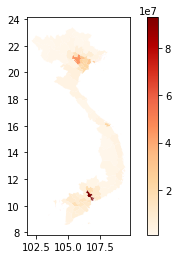

<Figure size 432x288 with 0 Axes>

In [7]:
# Plotting 
plt.figure(figsize=(20, 20))
VN_provinces.plot(column = 'pop_density (people/sq. km)', cmap = 'OrRd', legend = True)
plt.show()
plt.savefig('population_density_Vietnam.jpg')

In [31]:
# Create interactive map with folium 
import folium
#to render map in jupyter notebook
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [32]:

my_map = folium.Map(location=[17.882,107.091,], zoom_start=5)

folium.Choropleth(
    geo_data=VN_provinces,
    name="choropleth",
    data=VN_provinces,
    columns=["Province", "pop_density (people/sq. km)"],
    key_on="feature.properties.Province",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Population Density (people/sq.km)",
).add_to(my_map)
folium.LayerControl().add_to(my_map)

In [33]:
#Display it
embed_map(my_map, "Population Density.html")

Ho Chi Minh City is the province with highest population density followed by Ha Noi Capitol. The reason is these two provicines are the special metropolitan areas, one in the North and one in the South. 